<h2>import used libraries</h2>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>Upload dataset</h2>

In [9]:
dataset = pd.read_csv('Mall_Customers.csv')
datacut = dataset.iloc[:, [3, 4]].values
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h2>Dendrogram to find the optimal number of clusters</h2>

<h3>Viewing annual income and spending score</h3>

Text(0, 0.5, 'Annual Income (k$)')

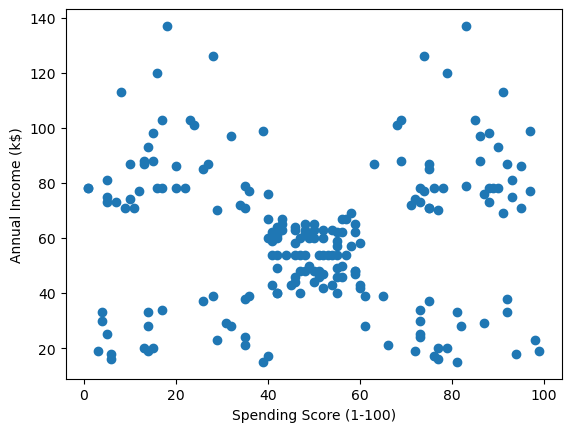

In [25]:
plt.scatter(dataset['Spending Score (1-100)'],dataset['Annual Income (k$)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

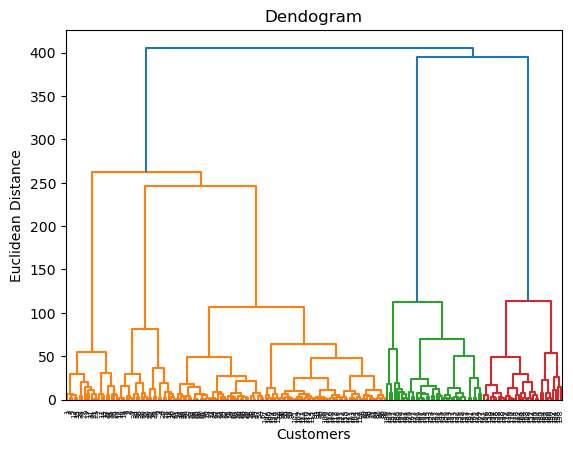

In [26]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(datacut, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

<h2>hierarchical clusterin model</h2>

In [29]:
from sklearn.cluster import AgglomerativeClustering
hierarchyCluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hierarchyCluster = hierarchyCluster.fit_predict(datacut)
y_hierarchyCluster

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

<h3>view hierarchical clustering cluster</h3>

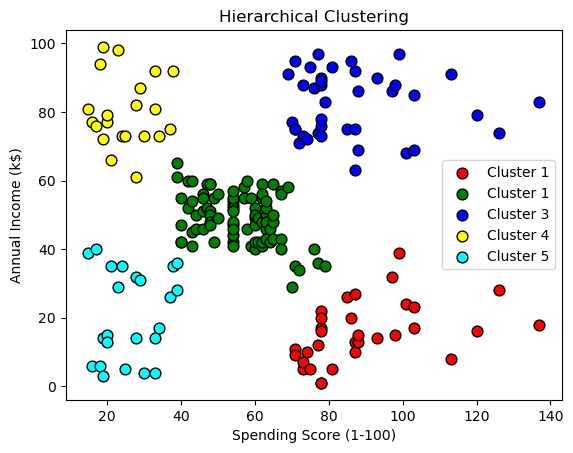

In [31]:
plt.scatter(datacut[y_hierarchyCluster == 0, 0], datacut[y_hierarchyCluster == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(datacut[y_hierarchyCluster == 1, 0], datacut[y_hierarchyCluster == 1, 1], color='green', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(datacut[y_hierarchyCluster == 2, 0], datacut[y_hierarchyCluster == 2, 1], color='blue',s=60, label='Cluster 3', edgecolors='black')
plt.scatter(datacut[y_hierarchyCluster == 3, 0], datacut[y_hierarchyCluster == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(datacut[y_hierarchyCluster == 4, 0], datacut[y_hierarchyCluster == 4, 1], color='cyan', s=60, label='Cluster 5', edgecolors='black')
plt.legend()
plt.title('Hierarchical Clustering')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.show()

<h2>Evaluate hierarchical clustering model</h2>

<h3>Silhouette Score aka Silhouette Coefficient</h3>

In [55]:
"""
Silhouette score aka Silhouette Coefficient is an evaluation metric that results in the range of -1 to 1. A score near 1 signifies the best importance that the data point is very compact within the cluster to which it belongs and far away from the other clusters. The score near -1 signifies the least or worst importance of the data point. A score near 0 signifies overlapping clusters. 
"""
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(datacut, y_hierarchyCluster)
silhouette_avg

0.5529945955148897